### **Import thư viện**

In [1]:
import requests
import re
import pandas as pd
import time

### **Test năm 2023**

In [2]:
urls = {
    "Toán": "https://dantri.com.vn/thpt/1/0/1/0/2023/0.2/search-gradle.htm",
    "Lý": "https://dantri.com.vn/thpt/2/0/1/0/2023/0.25/search-gradle.htm",
    "Hóa": "https://dantri.com.vn/thpt/3/0/1/0/2023/0.25/search-gradle.htm",
    "Sinh": "https://dantri.com.vn/thpt/4/0/1/0/2023/0.25/search-gradle.htm",
    "Văn": "https://dantri.com.vn/thpt/6/0/1/0/2023/0.25/search-gradle.htm",
    "Địa": "https://dantri.com.vn/thpt/7/0/1/0/2023/0.25/search-gradle.htm",
    "Sử": "https://dantri.com.vn/thpt/8/0/1/0/2023/0.25/search-gradle.htm",
    "GDCD": "https://dantri.com.vn/thpt/9/0/1/0/2023/0.25/search-gradle.htm",
    "Ngoại Ngữ": "https://dantri.com.vn/thpt/100/0/1/0/2023/0.2/search-gradle.htm"
}

In [3]:
headers = {"User-Agent": "Mozilla/5.0"}
data_all = []

for mon, url in urls.items():
    print(f"📥 Đang lấy dữ liệu cho: {mon}")
    try:
        res = requests.get(url, headers=headers)
        res.raise_for_status()
        json_data = res.json()

        for row in json_data.get("phoDiem", []):
            data_all.append({
                "mon": mon,
                "diem": row["diem"],
                "so_luong": row["soLuong"]
            })

        time.sleep(2)  # chờ 2 giây giữa mỗi request tránh lỗi 429 Client Error: Too Many Requests for url

    except Exception as e:
        print(f"❌ Lỗi khi lấy dữ liệu cho {mon}: {e}")


📥 Đang lấy dữ liệu cho: Toán
📥 Đang lấy dữ liệu cho: Lý
📥 Đang lấy dữ liệu cho: Hóa
📥 Đang lấy dữ liệu cho: Sinh
📥 Đang lấy dữ liệu cho: Văn
📥 Đang lấy dữ liệu cho: Địa
📥 Đang lấy dữ liệu cho: Sử
📥 Đang lấy dữ liệu cho: GDCD
📥 Đang lấy dữ liệu cho: Ngoại Ngữ


In [35]:
df = pd.DataFrame(data_all)
df.head(5)
# df.to_csv("pho_diem_thpt_2023.csv", index=False, encoding="utf-8-sig")

,mon,diem,so_luong
0,Toán,-0,2
1,Toán,0.2,1
2,Toán,0.4,2
3,Toán,0.6,4
4,Toán,0.8,32


### Loop từ 2019 - 2024

In [36]:
headers = {"User-Agent": "Mozilla/5.0"}
data_all = []

for nam_thi in range(2019, 2025):
    print(f"\n📅 ===== ĐANG THU THẬP DỮ LIỆU NĂM {nam_thi} =====")
    
    urls = {
        "Toán": f"https://dantri.com.vn/thpt/1/0/1/0/{nam_thi}/0.2/search-gradle.htm",
        "Lý": f"https://dantri.com.vn/thpt/2/0/1/0/{nam_thi}/0.25/search-gradle.htm",
        "Hóa": f"https://dantri.com.vn/thpt/3/0/1/0/{nam_thi}/0.25/search-gradle.htm",
        "Sinh": f"https://dantri.com.vn/thpt/4/0/1/0/{nam_thi}/0.25/search-gradle.htm",
        "Văn": f"https://dantri.com.vn/thpt/6/0/1/0/{nam_thi}/0.25/search-gradle.htm",
        "Địa": f"https://dantri.com.vn/thpt/7/0/1/0/{nam_thi}/0.25/search-gradle.htm",
        "Sử": f"https://dantri.com.vn/thpt/8/0/1/0/{nam_thi}/0.25/search-gradle.htm",
        "GDCD": f"https://dantri.com.vn/thpt/9/0/1/0/{nam_thi}/0.25/search-gradle.htm",
        "Ngoại Ngữ": f"https://dantri.com.vn/thpt/100/0/1/0/{nam_thi}/0.2/search-gradle.htm"
    }

    for mon, url in urls.items():
        print(f"🔍 [{nam_thi}] Đang lấy dữ liệu môn: {mon:<10} ... ", end="")
        try:
            res = requests.get(url, headers=headers)
            res.raise_for_status()
            json_data = res.json()

            for row in json_data.get("phoDiem", []):
                data_all.append({
                    "nam": nam_thi,
                    "mon": mon,
                    "diem": row["diem"],
                    "so_luong": row["soLuong"]
                })

            print("✅ Thành công")
            time.sleep(2)

        except Exception as e:
            print(f"❌ Lỗi: {e}")


📅 ===== ĐANG THU THẬP DỮ LIỆU NĂM 2019 =====
🔍 [2019] Đang lấy dữ liệu môn: Toán       ... ✅ Thành công
🔍 [2019] Đang lấy dữ liệu môn: Lý         ... ✅ Thành công
🔍 [2019] Đang lấy dữ liệu môn: Hóa        ... ✅ Thành công
🔍 [2019] Đang lấy dữ liệu môn: Sinh       ... ✅ Thành công
🔍 [2019] Đang lấy dữ liệu môn: Văn        ... ✅ Thành công
🔍 [2019] Đang lấy dữ liệu môn: Địa        ... ✅ Thành công
🔍 [2019] Đang lấy dữ liệu môn: Sử         ... ✅ Thành công
🔍 [2019] Đang lấy dữ liệu môn: GDCD       ... ✅ Thành công
🔍 [2019] Đang lấy dữ liệu môn: Ngoại Ngữ  ... ✅ Thành công

📅 ===== ĐANG THU THẬP DỮ LIỆU NĂM 2020 =====
🔍 [2020] Đang lấy dữ liệu môn: Toán       ... ✅ Thành công
🔍 [2020] Đang lấy dữ liệu môn: Lý         ... ✅ Thành công
🔍 [2020] Đang lấy dữ liệu môn: Hóa        ... ✅ Thành công
🔍 [2020] Đang lấy dữ liệu môn: Sinh       ... ✅ Thành công
🔍 [2020] Đang lấy dữ liệu môn: Văn        ... ✅ Thành công
🔍 [2020] Đang lấy dữ liệu môn: Địa        ... ✅ Thành công
🔍 [2020] Đang lấy dữ li

In [37]:
df = pd.DataFrame(data_all)
df.head()

,nam,mon,diem,so_luong
0,2019,Toán,-0,110
1,2019,Toán,0.2,1
2,2019,Toán,0.4,6
3,2019,Toán,0.6,36
4,2019,Toán,0.8,74


### **EDA điểm thi**

#### - Kiểm tra 1 số thông tin về data

In [38]:
df.info() # Kiểm tra thông tin về DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2334 entries, 0 to 2333
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   nam       2334 non-null   int64 
 1   mon       2334 non-null   object
 2   diem      2334 non-null   object
 3   so_luong  2334 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 73.1+ KB


In [39]:
# Chuyển đổi kiểu dữ liệu vì chưa ok lắm
df["diem"] = df["diem"].astype(float)

In [40]:
# Thông kê mô tả dữ liệu
df.describe()

,nam,diem,so_luong
count,2334.000000,2334.000000,2334.000000
mean,2021.500000,5.000000,14366.868466
std,1.708191,2.954977,16500.674750
min,2019.000000,-0.000000,0.000000
25%,2020.000000,2.500000,622.500000
50%,2021.500000,5.000000,8382.500000
75%,2023.000000,7.500000,22545.000000
max,2024.000000,10.000000,85044.000000


In [41]:
# Sửa lỗi -0 
df['diem'] = df['diem'].replace(-0, 0)
df['diem'].value_counts().sort_index(ascending=False)

diem
10.00    54
9.80     12
9.75     42
9.60     12
9.50     42
         ..
0.50     42
0.40     12
0.25     42
0.20     12
0.00     54
Name: count, Length: 81, dtype: int64

In [42]:
df.isna().sum() # Kiểm tra số lượng giá trị null trong từng cột

nam         0
mon         0
diem        0
so_luong    0
dtype: int64

In [43]:
df.duplicated().sum() # Kiểm tra số lượng dòng trùng lặp

0

In [44]:
# Lưu lại DataFrame đã chuyển đổi
df.to_csv("pho_diem_thpt_2019_2024.csv", index=False, encoding="utf-8-sig")

#### - Vẽ các biểu đồ

In [4]:
df = pd.read_csv("pho_diem_thpt_2019_2024.csv", encoding="utf-8-sig")
df.head()

,nam,mon,diem,so_luong
0,2019,Toán,0.0,110
1,2019,Toán,0.2,1
2,2019,Toán,0.4,6
3,2019,Toán,0.6,36
4,2019,Toán,0.8,74


In [5]:
df.head(5)

,nam,mon,diem,so_luong
0,2019,Toán,0.0,110
1,2019,Toán,0.2,1
2,2019,Toán,0.4,6
3,2019,Toán,0.6,36
4,2019,Toán,0.8,74


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm

In [13]:
year_list = sorted(df["nam"].unique())
mon_list = sorted(df["mon"].unique())

print('Năm thi:', year_list)
print('Môn thi:', mon_list)

Năm thi: [2019, 2020, 2021, 2022, 2023, 2024]
Môn thi: ['GDCD', 'Hóa', 'Lý', 'Ngoại Ngữ', 'Sinh', 'Sử', 'Toán', 'Văn', 'Địa']


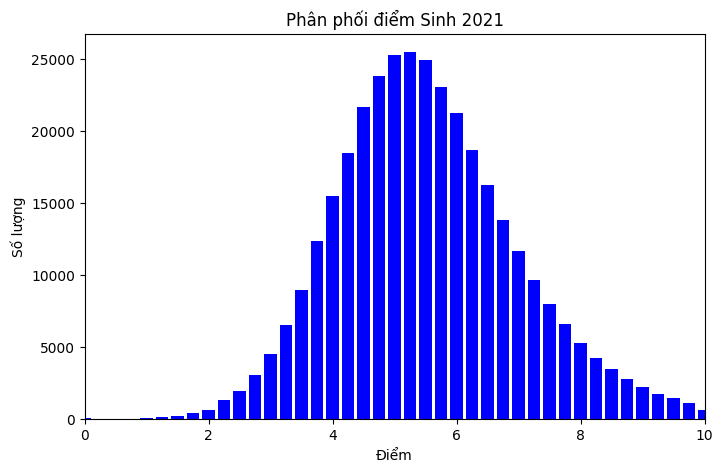

In [44]:
df_subset = df[(df['mon'] == "Sinh") & (df['nam'] == 2021)]

plt.figure(figsize=(8, 5))
plt.bar(df_subset['diem'], df_subset['so_luong'], width=0.2, color='blue')
plt.xlim(0, 10)
plt.xticks([0, 2, 4, 6, 8, 10])
plt.xlabel("Điểm")
plt.ylabel("Số lượng")
plt.title("Phân phối điểm Sinh 2021")
plt.show()

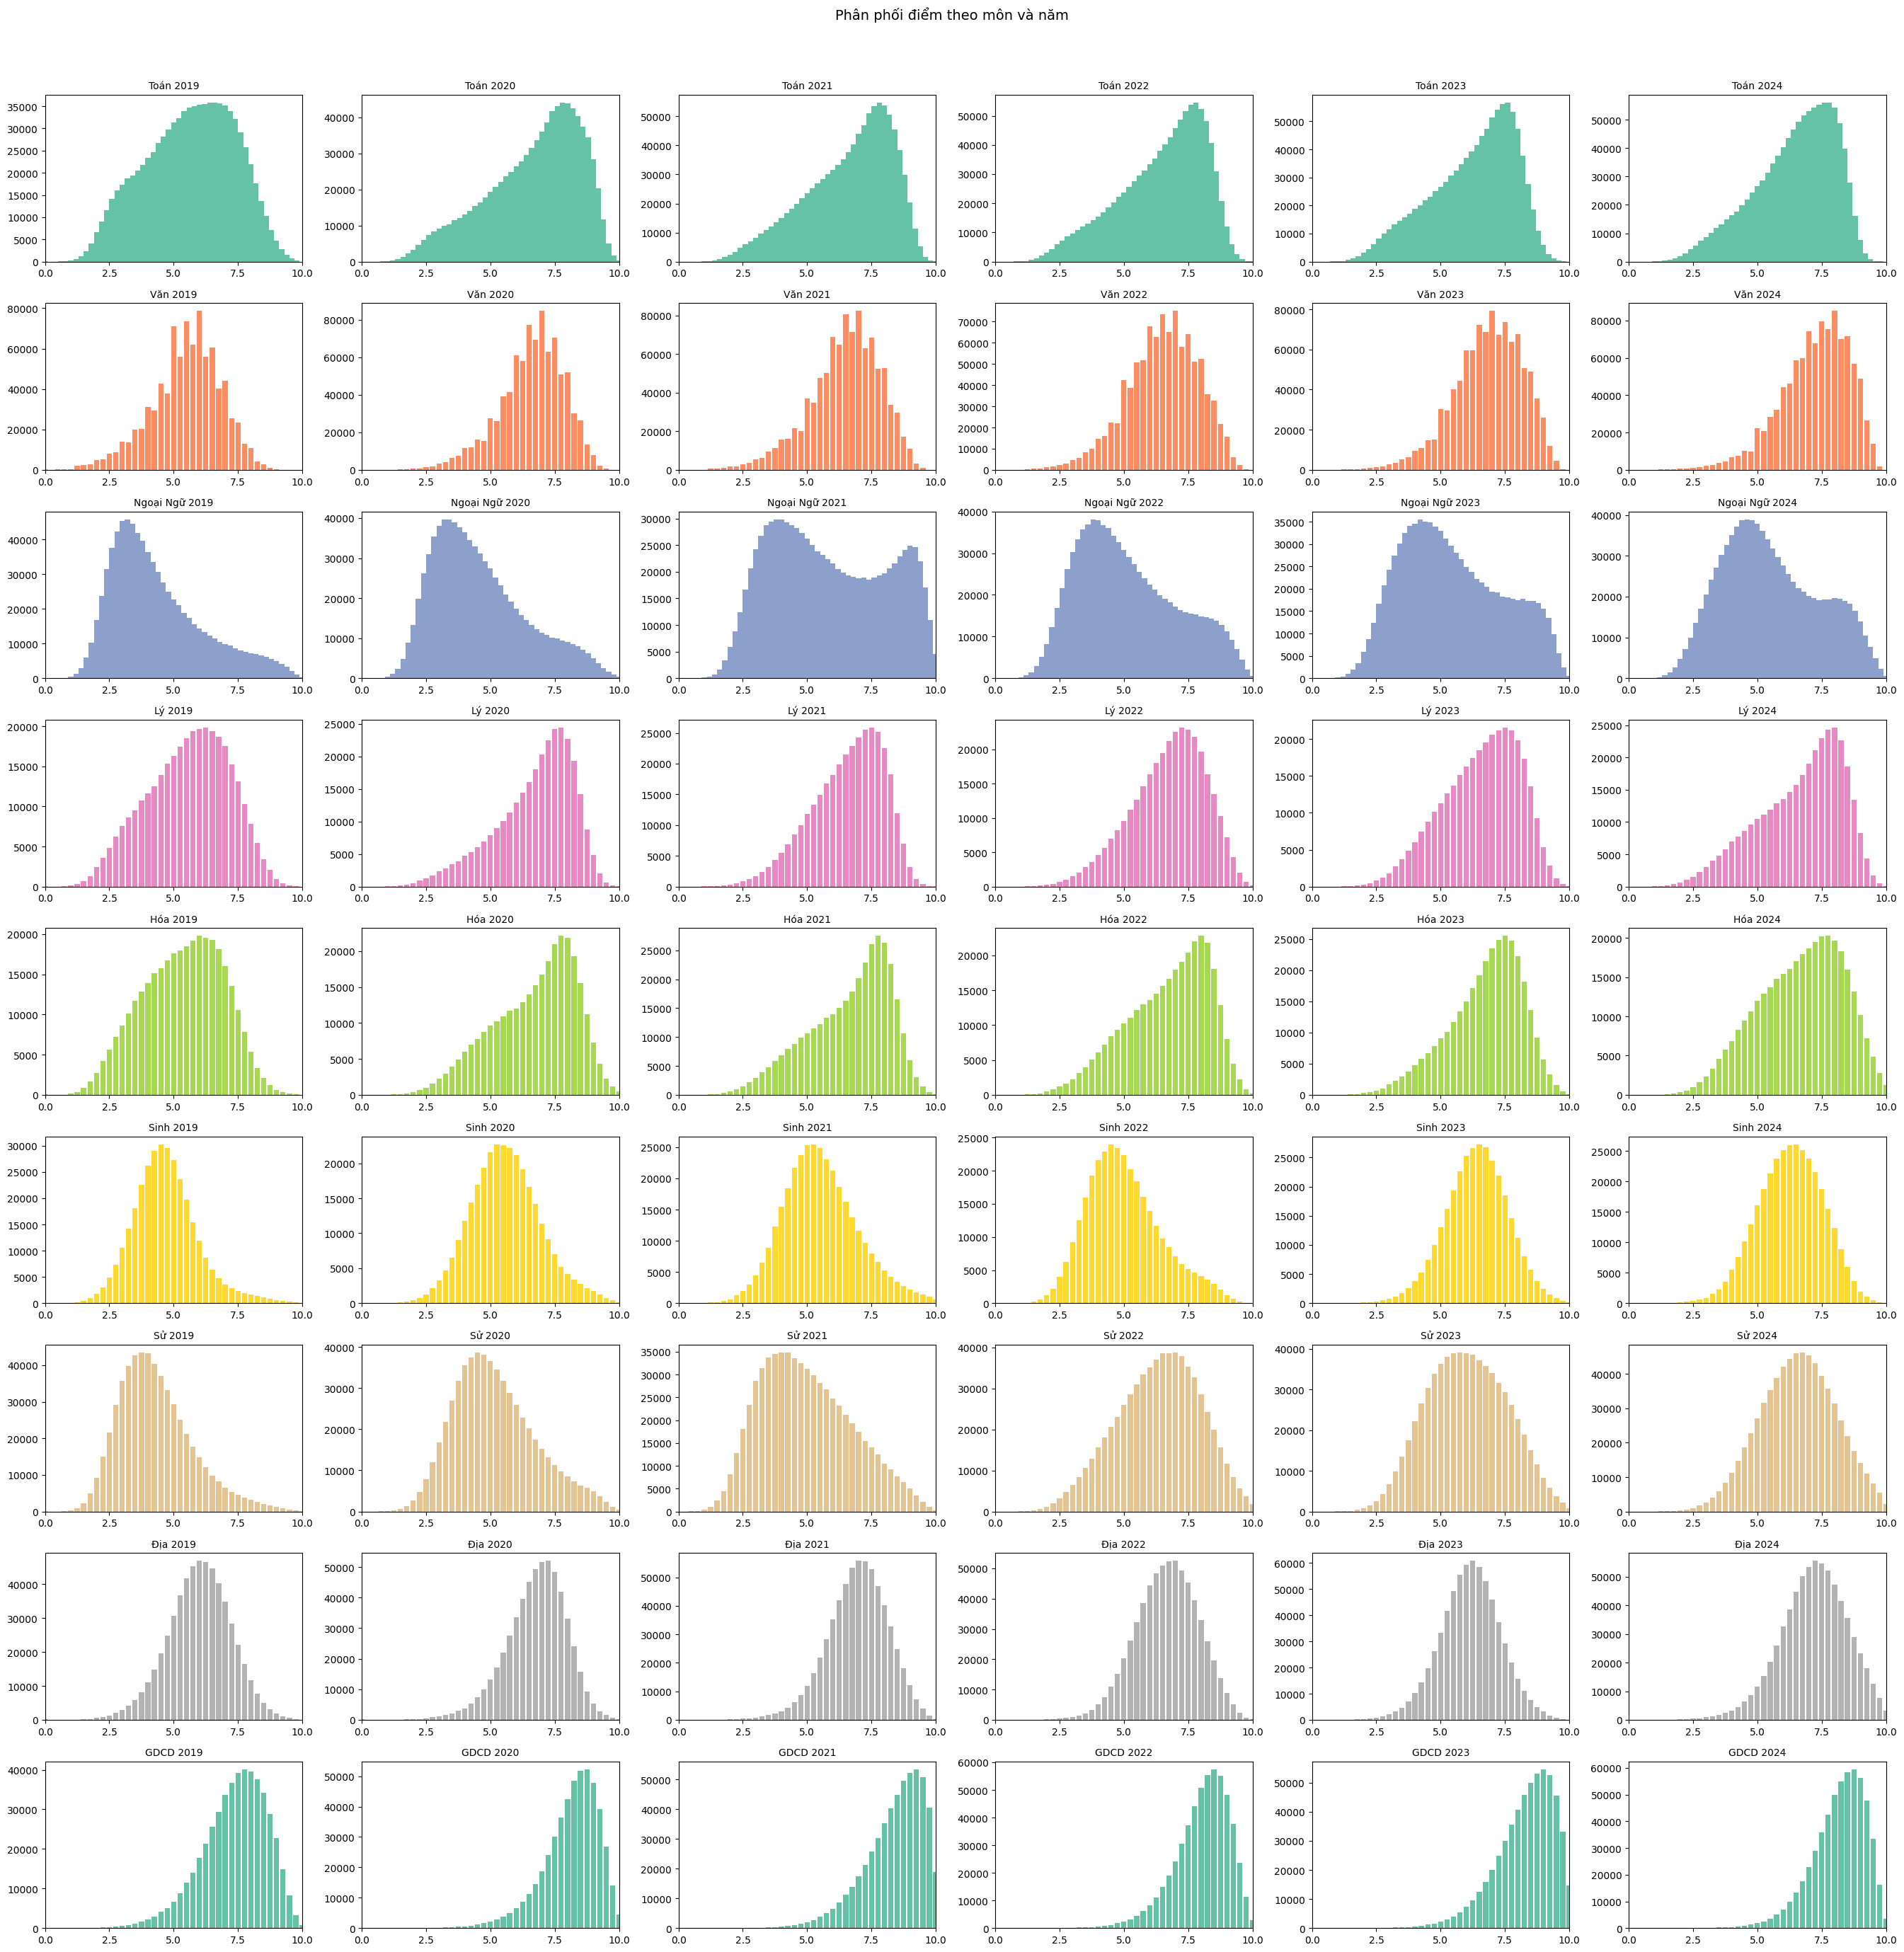

In [47]:
# Xác định các giá trị duy nhất
year_list = sorted(df["nam"].unique())
mon_list = ['Toán', 'Văn', 'Ngoại Ngữ', 'Lý', 'Hóa', 'Sinh', 'Sử', 'Địa', 'GDCD']

# Thiết lập subplot grid
n_rows = len(mon_list)
n_cols = len(year_list)
fig, axs = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(4.5 * n_cols, 3 * n_rows))

# Màu riêng cho từng môn học
palette_mon = dict(zip(mon_list, sns.color_palette("Set2", n_colors=len(mon_list))))

# Vẽ từng biểu đồ con
for i, mon in enumerate(mon_list):
    for j, nam in enumerate(year_list):
        axe = axs[i, j] if n_rows > 1 else axs[j]
        subset = df[(df["mon"] == mon) & (df["nam"] == nam)]


        axe.bar(subset['diem'], subset['so_luong'], width=0.2, color=palette_mon[mon])
        axe.set_title(f"{mon} {nam}", fontsize=10)
        axe.set_xlim(0, 10)
        axe.set_xticks([0, 2.5, 5, 7.5, 10])
        axe.set_xlabel("")
        axe.set_ylabel("")

# Chú thích chung
fig.suptitle("Phân phối điểm theo môn và năm", fontsize=14, y=1.02)
plt.tight_layout()
plt.show()